<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EA%B2%8C%EC%9D%B4%ED%8A%B8%ED%9A%8C%EB%A1%9C_QuantumvsDigitalCircuit_20231103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=8a95c74d22c69c10b64a329cca320ab563d2a34dd5cede3079e8dfc7f00252a0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc5

# 양자회로 정리

*   Quantum Circuit: Qubit, Gates, Measurements and Classical bits
*   Quantum Gates
  *   Rotation Gates: change the quantum state of a qubit
  *   Controlled Gates: change the state if all the contol qubits are 1





In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
qc.x(0) # a.k.a. NOT
qc.barrier()
qc.cx(0, 1) # a.k.a. CNOT
qc.barrier()
qc.ccx(0, 1, 2) # a.k.a. TOFF, CCNOT
qc.barrier()
qc.swap(1, 2)
qc.measure(range(3), range(3))
qc.draw('mpl')

{'10': 262, '00': 262, '01': 500}


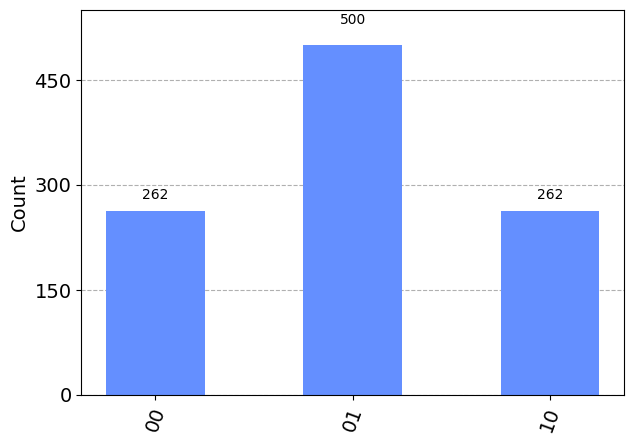

In [62]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

# Logical meaning of CX & CCX


*   CX(c, q) == c XOR q<br>
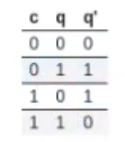

*   CCX(c1, c2, q) == (c1 AND c2) XOR q<br>

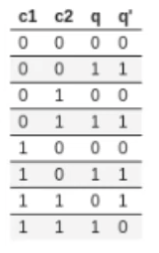




# Quantum gates are Reversible
*   Reversible = Bijection(전단사함수) = one-to-one and onto



# 양자회로로 디지털 반-가산기 구현
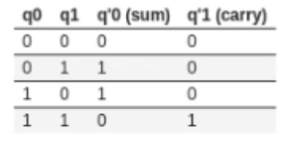

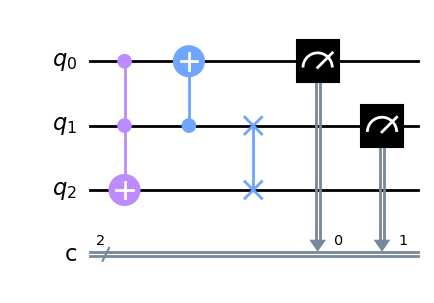

In [59]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 2)
qc.ccx(0, 1, 2) # AND의 효과를 가지고 가고
qc.cx(1, 0)     # XOR의 효과를 가지고 가고
qc.swap(1, 2)   # swap으로 마무리
qc.measure(range(2), range(2))
qc.draw('mpl')

# 아래와 같이 다시 한번 최적화 가능
측정을 q2를 해버리면 됨

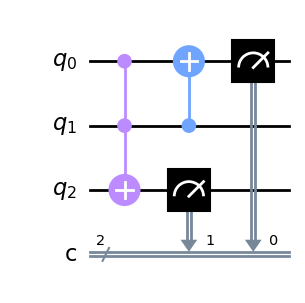

In [60]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 2)
qc.ccx(0, 1, 2) # AND의 효과를 가지고 가고
qc.cx(1, 0)     # XOR의 효과를 가지고 가고
#qc.swap(1, 2)   # swap으로 마무리
qc.measure([0, 2], range(2))
qc.draw('mpl')

# Half-adder with Superposition
Hadamard를 걸어서 결과를 예측<br>
00: 25%<br>
01: 25%<br>
10: 25%<br>
11: 25%<br>

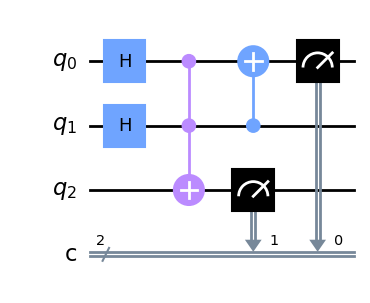

In [61]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 2)
qc.h(range(2))
qc.ccx(0, 1, 2)
qc.cx(1, 0)
qc.measure([0, 2], range(2))
qc.draw('mpl')

{'01': 485, '10': 272, '00': 267}


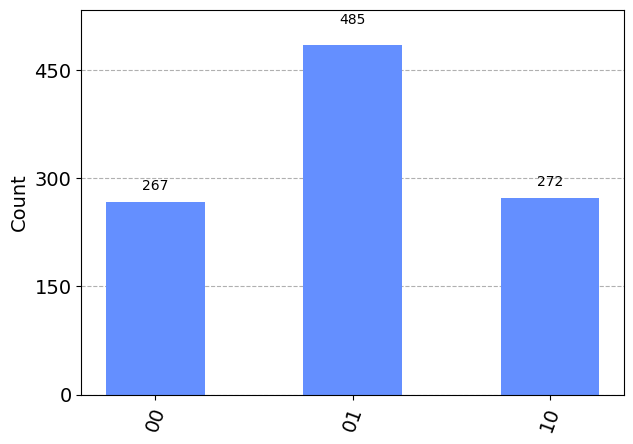

In [63]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

위의 반가산기처럼 결과가 확률이기 때문에 분포가 넓게 퍼져있으면, 그 분포를 파악하기 위해사여 여러번 측정해야 하기 때문에 비효율적, 즉 기존의 디지털 논리회로보다 좋은 것이 없다.

그런데, 입력은 복잡하고 경우의 수가 많지만 출력은 Yes, No만 있는 문제<br>
즉, 결정문제(Decision Problem) 알고리즘은 양자쪽이 최고임.<br>
많은 수들 중에 소수인지/아닌지를 판별하는 문제
